01-PortlandFinalStorm.png
02-BostonFinalStorm.png
03-NewportFinalStorm.png
04-MontaukFinalStorm.png
05-The BatteryFinalStorm.png
06-Sandy HookFinalStorm.png
07-Atlantic City-FinalStorm.png
08-Sewells PtFinalStorm.png


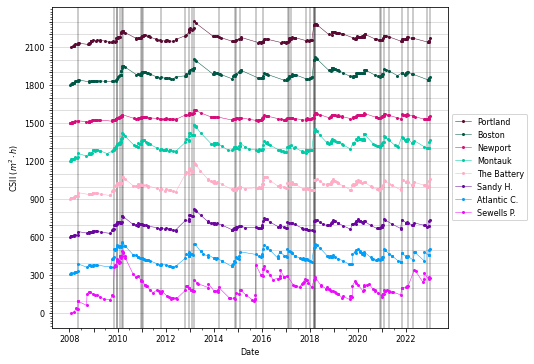

In [1]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import shutil
import numpy as np
from scipy.stats import linregress
from plot_config import colors, font_family,  label_list
from dateutil import parser
import csv

font_size = 8
label_size = 6

import matplotlib.dates as mdates
%matplotlib inline
from dateutil.relativedelta import relativedelta

# Set the start and end years for the x-axis
startYear = 2008
endYear = 2022

# Make plots for all stations with a single delta value
delta = 0.3
delta_str = str(delta).replace('.', '-')

# Set the path to the directory containing the CSV files
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
dir_path = os.path.join(parent_dir, 'Final_Storm_Results')

# Get a list of CSV files in the Final_Storm_Results directory
file_list = os.listdir(dir_path)
csv_files = [filename for filename in file_list if filename.endswith('.csv')]

# Create the output filename based on the current date and time
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")
#output_filename = f"Compare_North_{startYear}_{endYear}_delta_{delta_str}"
output_filename = f"fig10"


north_colors = colors[:8]
north_labels = label_list[:8]

# Define dates and labels of hurricanes (tropical storms)
noreasters = []

with open('Noreaster_dates.txt', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        if len(row) >= 2:  # Ensure the row has at least two elements
            noreaster_name = row[0]
            noreaster_date_str = row[1].strip()  # Strip whitespace from the date string
            if noreaster_date_str:  # Check if the date string is not empty
                noreaster_date = datetime.strptime(noreaster_date_str, '%m/%d/%Y')
                noreasters.append((noreaster_date, noreaster_name))
            
# Create a list to store the dataframes
dfs = []

i = 0
csv_files = sorted (csv_files)
northern_stations = csv_files[:8]

# Convert millimeters to inches
mm_to_inch = 0.0393701
fig_width_mm = 180
fig_height_mm = 150
fig_width_inch = fig_width_mm * mm_to_inch
fig_height_inch = fig_height_mm * mm_to_inch
fig, ax = plt.subplots(figsize=(fig_width_inch, fig_height_inch))

t0 = datetime(1900, 8, 26)
time_int = relativedelta(days=6*30)

# Add vertical lines at the specified dates and labels
for noreaster_date, label in noreasters:
    dt = noreaster_date - t0
    t0 = noreaster_date
    #print(dt.days, time_int.days)
    ax.axvline(x=noreaster_date, color='black', linestyle='-', linewidth = 0.4)
    #ax.annotate(
    #    label,  # The text of the label
    #    xy=(noreaster_date, ax.get_ylim()[1]),  # Position of the label
    #    xytext=(15, 400) if dt.days < time_int.days else (0, 400),  # Offset of the label from the point
    #    textcoords='offset points',
    #    rotation=45,  # Rotate the label by 45 degrees
    #    fontsize=14,  # Font size of the label
    #    color='black'  # Color of the label
    #)


for filename in northern_stations:
    if filename.endswith(".csv"):
        filepath = os.path.join(dir_path, filename)
        plotname = os.path.splitext(filename)[0] + ".png"
        print(plotname)
        with open(filepath) as f:
            reader = csv.reader(f)
            next(reader)  # skip the header row
            dates = []
            sepi = []
            tp = []

            for row in reader:
                date = parser.parse(row[0]).date()
                sepi_val = float(row[1])
                tp_val = float(row[2])
                if startYear <= date.year <= endYear:
                    dates.append(date)
                    sepi.append(sepi_val)
                    tp.append(tp_val)
                
        tau_p = [t / 365 for t in tp]
        csii = [sepi[0]]
        for j in range(1, len(sepi)):
            csii_val = sepi[j] + csii[j-1] * delta ** tau_p[j]
            csii.append(csii_val)

        ax.plot(dates, [x + 2100 - i * 300 for x in csii], label=north_labels[i], marker='o', markersize = 2, color=north_colors[i % len(north_colors)], linewidth = 0.5)
        i += 1

ax.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
ax.tick_params(axis='both', which='major', labelsize=font_size)
ax.tick_params(axis='both', which='minor', labelsize=label_size)

# x axis
ax.set_xlabel("Date", fontsize=font_size)
ax.xaxis.set_major_locator(mdates.YearLocator(2))
minor_xtick_positions = [
    datetime(2008, 7, 1), datetime(2009, 7, 1), datetime(2010, 7, 1), datetime(2011, 7, 1),
    datetime(2012, 7, 1), datetime(2013, 7, 1), datetime(2014, 7, 1), datetime(2015, 7, 1),
    datetime(2016, 7, 1), datetime(2017, 7, 1), datetime(2018, 7, 1), datetime(2019, 7, 1),
    datetime(2020, 7, 1), datetime(2021, 7, 1)
]
ax.set_xticks(minor_xtick_positions, minor=True)
ax.set_xticklabels([], minor=True)  # Hide labels for minor tick marks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
xtick_positions = [
    datetime(2008, 1, 1), datetime(2009, 1, 1), datetime(2010, 1, 1), datetime(2011, 1, 1),
    datetime(2012, 1, 1), datetime(2013, 1, 1), datetime(2014, 1, 1), datetime(2015, 1, 1),
    datetime(2016, 1, 1), datetime(2017, 1, 1), datetime(2018, 1, 1), datetime(2019, 1, 1),
    datetime(2020, 1, 1), datetime(2021, 1, 1), datetime(2022, 1, 1)
]
xtick_labels = ['2008', '', '2010', '', '2012', '', '2014', '', '2016', '', '2018', '', '2020', '', '2022']
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

# y axis
ax.set_ylabel("CSII ($m^2 \cdot h$)", fontsize=font_size)
ax.yaxis.set_minor_locator(plt.MultipleLocator(20))
ax.yaxis.set_major_locator(plt.MultipleLocator(100))
ytick_positions = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300]
ytick_labels = ['0', '','', '300', '','', '600','', '', '900','', '', '1200','', '', '1500', '', '', '1800', '', '', '2100', '', '']
ax.set_yticks(ytick_positions)
ax.set_yticklabels(ytick_labels)
#ax.text(0.5, -0.1, "(a)", transform=ax.transAxes, fontsize=font_size, ha='center')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font_size)
legend.set_title(None)


#ax.set_ylim([0, 1425])

# Save the plot to a file
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

